In [1]:
import numpy as np
import pypolycontain as pp
np.set_printoptions(2)

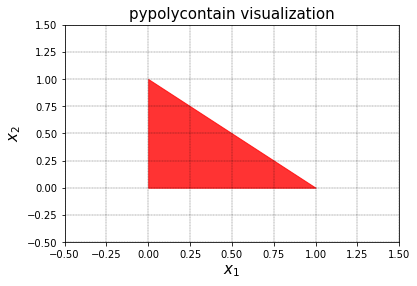

In [2]:
H=np.array([[1,1],[-1,0],[0,-1]])
h=np.array([1,0,0]).reshape(3,1)
X=pp.H_polytope(H,h)
pp.visualize([X])

In [3]:
# Z_i=pp.zonotope(x=np.zeros((n,1)),G=G)
import pydrake.solvers.mathematicalprogram as MP
# use SOCS solver
import pydrake.solvers.scs as SCS
mysolver=SCS.ScsSolver()

success
G= [[ 2.50e-01 -4.88e-06]
 [-4.88e-06  2.50e-01]]
x= [0.25 0.25]


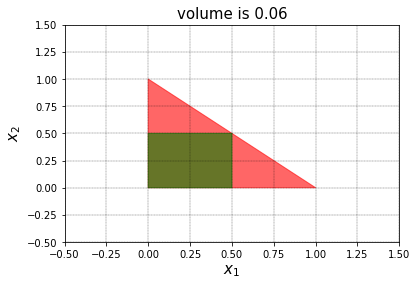

In [4]:
program=MP.MathematicalProgram()
G=program.NewSymmetricContinuousVariables(2,'G') 
x=program.NewContinuousVariables(2,1,'x')
program.AddPositiveSemidefiniteConstraint(G)
program.AddMaximizeLogDeterminantSymmetricMatrixCost(G)
Z=pp.zonotope(x=x,G=G) 
pp.subset(program,Z,X)
result=mysolver.Solve(program,None,None)
if result.is_success():
    print("success")
    G_n= result.GetSolution(G)
    x_n= result.GetSolution(x)
    print("G=",G_n)
    print("x=",x_n)
else:
    print("failure") 
Z_n=pp.zonotope(x=x_n,G=G_n,color='green')
pp.visualize([X,Z_n],alpha=0.6,title=r'volume is %0.0002f'%Z_n.volume())